Ask the following questions and look for the answers using code and plots:

* Can you count something interesting?
* Can you find trends (e.g. high, low, increasing, decreasing, anomalies)?
* Can you make a bar plot or a histogram?
* Can you compare two related quantities?
* Can you make a scatterplot?
* Can you make a time-series plot?
* Looking at the plots, what are some insights you can make? Do you see any correlations? Is there a hypothesis you’d like to investigate further? What other questions do the insights lead you to ask?
* Now that you’ve asked questions, hopefully you’ve found some interesting insights. Is there a narrative or a way of presenting the insights using text and plots that tells a compelling story? What are some other trends/relationships you think will make the story more complete?

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv("default_of_credit_card_clients.csv")

Variable definitions (recoded):

* limit_bal: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* sex: Gender (1 = male; 2 = female).
* education: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* marriage: Marital status (1 = married; 2 = single; 3 = others).
* age: Age (year).
* pay_#: History of past payment. Past monthly payment records (from April to September, 2005) as follows: pay_01 = the repayment status in September, 2005; pay_02 = the repayment status in August, 2005; . . .;pay_06 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* bill_amt#: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* pay_amt#: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.
* defaulted: Whether the customer defaulted (1) or did not default (0) their credit card account

In [3]:
data.head()

,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,defaulted
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
data.shape

(29459, 24)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29459 entries, 0 to 29458
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   limit_bal  29459 non-null  int64
 1   sex        29459 non-null  int64
 2   education  29459 non-null  int64
 3   marriage   29459 non-null  int64
 4   age        29459 non-null  int64
 5   pay_0      29459 non-null  int64
 6   pay_2      29459 non-null  int64
 7   pay_3      29459 non-null  int64
 8   pay_4      29459 non-null  int64
 9   pay_5      29459 non-null  int64
 10  pay_6      29459 non-null  int64
 11  bill_amt1  29459 non-null  int64
 12  bill_amt2  29459 non-null  int64
 13  bill_amt3  29459 non-null  int64
 14  bill_amt4  29459 non-null  int64
 15  bill_amt5  29459 non-null  int64
 16  bill_amt6  29459 non-null  int64
 17  pay_amt1   29459 non-null  int64
 18  pay_amt2   29459 non-null  int64
 19  pay_amt3   29459 non-null  int64
 20  pay_amt4   29459 non-null  int64
 21  pay_amt5   2

In [6]:
#pay_0 variable needs to be renamed to pay_1 to be consistent with other variables
data = data.rename(columns={"pay_0":"pay_1"})

In [7]:
data.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'defaulted'],
      dtype='object')

* The goal is to build a model that will use all possible factors to predict if a customer will or will not default the next month. 
* In the context of this model, a default is the failure to pay the interest or principal on a credit card payment. 
* We have 3 categorical variables: sex, education, marriage, and age, which have been encoded to a numerical value. 
* We have 3 time series variables: past repayment status (*pay_#*) encoded to a numerical value, the bill amount (*bill_amt#*), and the pay amount of the bill (*pay_amt#*) where each time series is recorded for the past 6 months (April to September, or months 4 to 9).
* The predictive variable is defaulted (*defaulted*) which is encoded as 0 (no default) or 1 (defaulted)

We can perform EDA (data storytelling) to uncover any interesting insights on the features, prior to performing any feature engineering, resampling, or model selection.

#### Can you count something interesting?

In [8]:
data.education.value_counts()

2    13791
1    10459
3     4752
4      457
Name: education, dtype: int64

In [9]:
(13791+10459)/len(data)

0.8231779761702706

82.3% of customers accounts for customers with an education of at least university or graduate school

In [10]:
#We can count the percent of male vs female who defaulted on a loan (1 = male; 2 = female)
print(data.sex.value_counts())
print(data.sex.value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

2    17796
1    11663
Name: sex, dtype: int64
2    60.4%
1    39.6%
Name: sex, dtype: object


We have an imbalanced dataset of ***20%*** more accounts belong to female 

In [11]:
#What about the percent of customers that defaulted (1) vs not defaulted (0)?
print(data.defaulted.value_counts())
print(data.defaulted.value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

0    22940
1     6519
Name: defaulted, dtype: int64
0    77.9%
1    22.1%
Name: defaulted, dtype: object


Again we have a disproportionate number of customers (***55.8%*** more) who represent as not defaulted (0) vs defaulted (1).

We can plot the number of male vs female who defaulted vs did not default from this sample data.

#### Can you make a bar plot or a histogram?

Male no default mean limit balance: 174909.13200723327


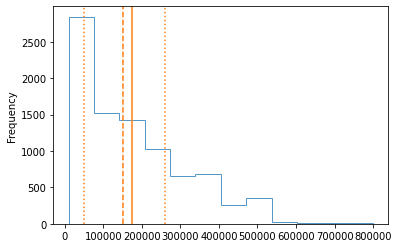

In [12]:
#For males who did not default, what is the dist of their limit balance?
male_nodefault = data.query('(defaulted == 0) & (sex == 1)') 
male_nodefault.limit_bal.plot.hist(bins=12,histtype='step',alpha=0.75,density=False)

plt.axvline(male_nodefault.limit_bal.mean(),c='C1')
plt.axvline(male_nodefault.limit_bal.median(),c='C1',linestyle='--')
plt.axvline(male_nodefault.limit_bal.quantile(0.25),c='C1',linestyle=':')
plt.axvline(male_nodefault.limit_bal.quantile(0.75),c='C1',linestyle=':')

#['limit_bal'].plot.density(bw_method=0.5)
#pp.axis(xmin=0,xmax=800000,ymin=0)
print("Male no default mean limit balance:",male_nodefault.limit_bal.mean())

Male defaulted mean limit balance: 125473.42095914742


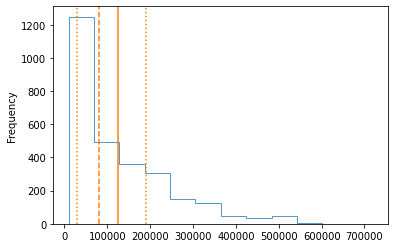

In [13]:
male_defaulted = data.query('(defaulted == 1) & (sex == 1)') 
male_defaulted.limit_bal.plot.hist(bins=12,histtype='step',alpha=0.75,density=False)

plt.axvline(male_defaulted.limit_bal.mean(),c='C1')
plt.axvline(male_defaulted.limit_bal.median(),c='C1',linestyle='--')
plt.axvline(male_defaulted.limit_bal.quantile(0.25),c='C1',linestyle=':')
plt.axvline(male_defaulted.limit_bal.quantile(0.75),c='C1',linestyle=':')
print("Male defaulted mean limit balance:",male_defaulted.limit_bal.mean())

Female no default mean limit balance: 179324.86517172863


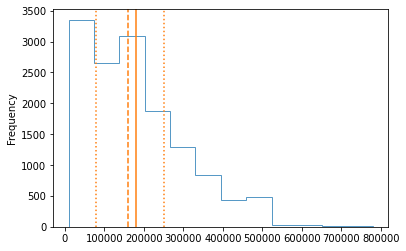

In [14]:
female_nodefault = data.query('(defaulted == 0) & (sex == 2)') 
female_nodefault.limit_bal.plot.hist(bins=12,histtype='step',alpha=0.75,density=False)

plt.axvline(female_nodefault.limit_bal.mean(),c='C1')
plt.axvline(female_nodefault.limit_bal.median(),c='C1',linestyle='--')
plt.axvline(female_nodefault.limit_bal.quantile(0.25),c='C1',linestyle=':')
plt.axvline(female_nodefault.limit_bal.quantile(0.75),c='C1',linestyle=':')
print("Female no default mean limit balance:",female_nodefault.limit_bal.mean())

Female defaulted mean limit balance: 133407.1274298056


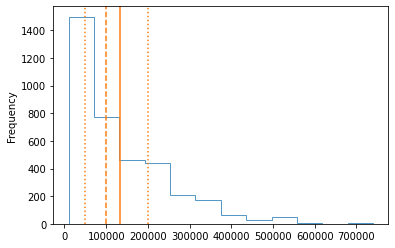

In [15]:
female_defaulted = data.query('(defaulted == 1) & (sex == 2)') 
female_defaulted.limit_bal.plot.hist(bins=12,histtype='step',alpha=0.75,density=False)

plt.axvline(female_defaulted.limit_bal.mean(),c='C1')
plt.axvline(female_defaulted.limit_bal.median(),c='C1',linestyle='--')
plt.axvline(female_defaulted.limit_bal.quantile(0.25),c='C1',linestyle=':')
plt.axvline(female_defaulted.limit_bal.quantile(0.75),c='C1',linestyle=':')
print("Female defaulted mean limit balance:",female_defaulted.limit_bal.mean())

We see that both men and women who did not default had on average a very similar limit balance ~174909 (male) vs 179325 (female), or a difference of 4904 higher for female

However females on average who defaulted had a slightly higher limit balance than balance of average ~ 133407 (female) vs 125473 (male), or a difference of ~ $8000

Based on the high similarity and the imbalance of the female group that defaulted, a strong inclination may be to consider to lowering the limit balance for all females to match the mean limit balance of the male group. However we are only inspecting two features (sex and limit balance) of the total features (24) which is not enough to vouch for this change. Payment history should indicate stronger patterns on which payments borrowers are defaulting and how many months they are behind. 

We can take a look at the other categorical features (education,marriage,age) first which may also provide some interesting insights.

In [16]:
data.marriage.value_counts()

2    15878
1    13581
Name: marriage, dtype: int64

In [17]:
import seaborn as sns

([<matplotlib.axis.XTick at 0x120473490>,
 <a list of 2 Text major ticklabel objects>)

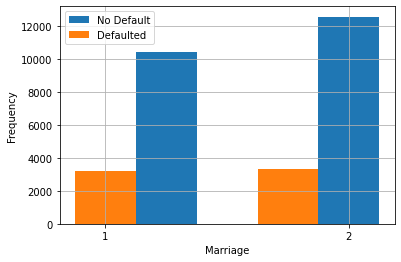

In [18]:
#sns.distplot(data.query('defaulted == 0')['marriage'],label="Defaulted")
#sns.distplot(data.query('defaulted == 1')['marriage'],label="No Default")
data.query('defaulted == 0')['marriage'].hist(label="No Default",bins=4,stacked=False,align='right')
data.query('defaulted == 1')['marriage'].hist(label="Defaulted",bins=4,stacked=False,align='left')
plt.xlabel("Marriage")
plt.ylabel("Frequency")
plt.legend()
plt.xticks(np.arange(1, 3, step=1))

Unmarried (2) and married customers (1) have a similar frequency ratio of whom defaulted vs whom did not default. Unmarried customers (2) appear to have slightly more who did not default (~2000)

#### Can you make a scatterplot?

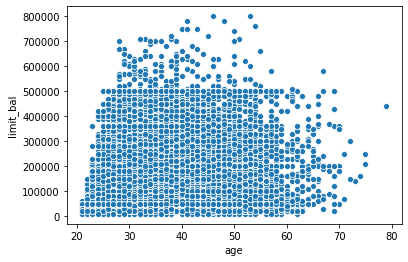

In [19]:
#sns.scatterplot(x="age",y="defaulted",data=data)
#sns.scatterplot(data.query('defaulted == 0')[["age","education"]],data)
sns.scatterplot(x="age",y="limit_bal",data=data.query('defaulted == 0'))

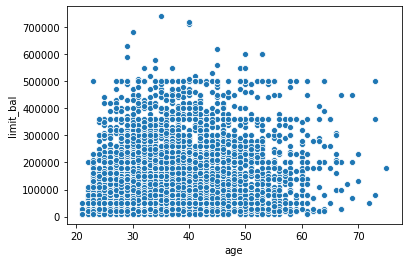

In [20]:
sns.scatterplot(x="age",y="limit_bal",data=data.query('defaulted == 1'))

Additionally, there isn't a clear distinction of limit balance differences across ages between those who defaulted versus those who did not. In the second scatterplot, we do see that the distribution trailes off after ~ age 40 indicating that clients under 40 are likely to default on their credit card.

We can also take a closer look at the distribution by age for the non-default vs defaulted group

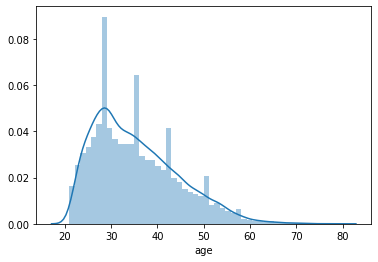

In [21]:
sns.distplot(data.query('defaulted == 0').age)

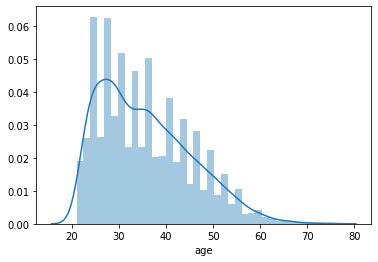

In [22]:
sns.distplot(data.query('defaulted == 1').age)

Again, it seems clear that clients in the ~20 to 40 years old age bracket are more likely to default on their loan. However there is also a higher representation of clients in this age group overall from the sample dataset and should be taken into consideration for resampling and modeling.

#### Can you find trends (e.g. high, low, increasing, decreasing, anomalies)?

* We can plot a trend in payment activity, i.e. if a customer was consistent or not in their monthly payments for defaulters vs non-defaulters.
* We can also plot payment activity as a function of age and education which may provide some interesting insight

In [23]:
data.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'defaulted'],
      dtype='object')

As expected, customers with a university and graduate school education 

#### Can you compare two related quantities?
We can compare the counts of payment delinquency across all payment months

In [24]:
features = ['pay_1','pay_2','pay_3','pay_4','pay_5','pay_6']
gv = []
for f in features:
    gv.append(data[f].value_counts().sort_index())
#data.groupby('education')['pay_2'].value_counts().sort_index()

In [25]:
gv = pd.DataFrame(gv).transpose()

In [26]:
gv

,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6
-2,2715.0,3725.0,4029.0,4292.0,4496.0,4847.0
-1,5599.0,5945.0,5831.0,5578.0,5441.0,5632.0
0,14445.0,15422.0,15463.0,16138.0,16596.0,15949.0
1,3622.0,25.0,3.0,1.0,NaN,NaN
2,2626.0,3870.0,3758.0,3114.0,2594.0,2728.0
3,314.0,321.0,234.0,175.0,176.0,183.0
4,75.0,95.0,73.0,69.0,84.0,47.0
5,24.0,24.0,21.0,35.0,16.0,12.0
6,11.0,12.0,23.0,3.0,3.0,16.0
7,9.0,20.0,24.0,54.0,53.0,45.0


In [27]:
gv = gv.fillna(0)

* We see based on a frequency of payments across months, a majority of customers were able to make payments (0,-1,-2) with a trend of customers delinquent by 2 months across all payment months.
* Interestingly across all payment months, except for the first payment month, all customers do not appear to be delinquint for 1 month and either paid in time or in fact delinquint for 2 months or more.
* There is a clear sharp decline of past due of 3 months or more.

For payment (x-axis):

-1 = pay duly;
1 = payment delay for one month;
2 = payment delay for two months; . . .;
8 = payment delay for eight months;
9 = payment delay for nine months and above

We see that for all payment status plotted against education, 



We see borrowers who did not befault on their loan were generally consistent with their debt repayment (pay_amt* >= bill_amt*)

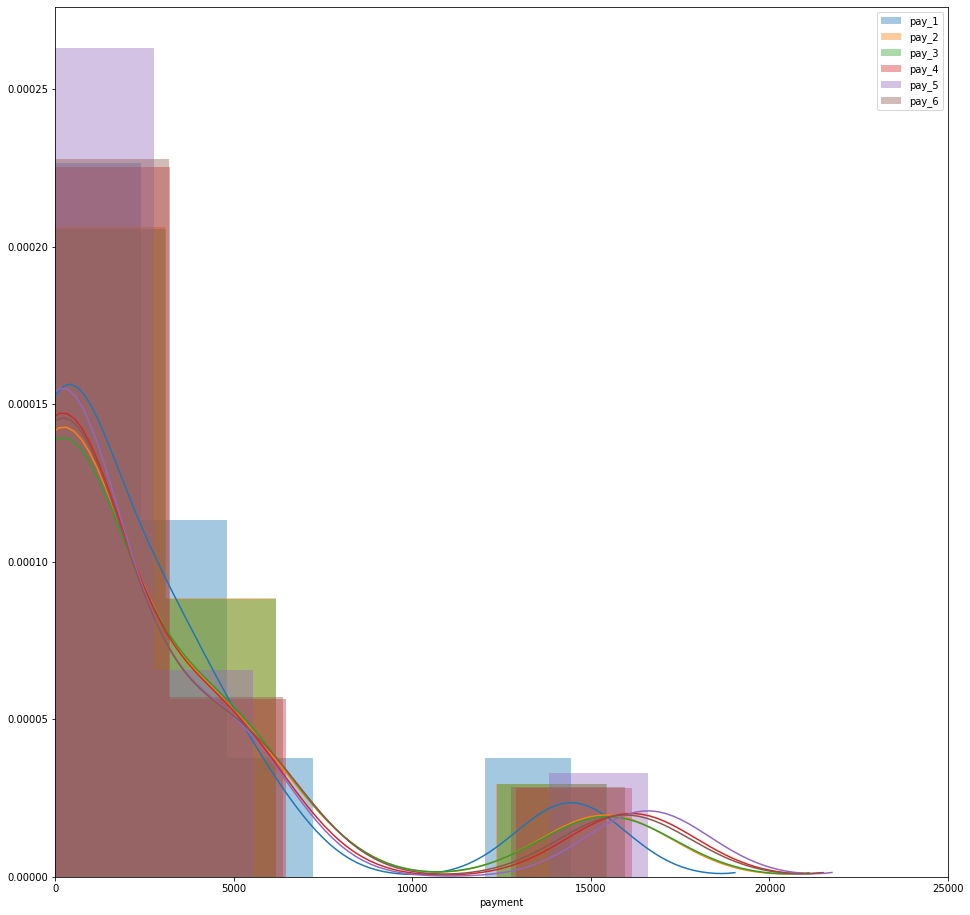

In [28]:
plt.figure(figsize=(16, 16))
plt.xlim(0, 25000)
features = ["pay_1","pay_2","pay_3","pay_4","pay_5","pay_6"]
for p in features:
    pay_lp = sns.distplot(gv[p])
    pay_lp.legend(features)
    pay_lp.set_xlabel('payment')

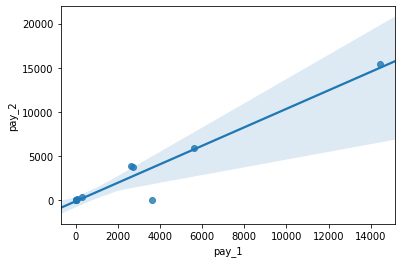

In [29]:
sns.regplot(x="pay_1", y="pay_2", data=gv);

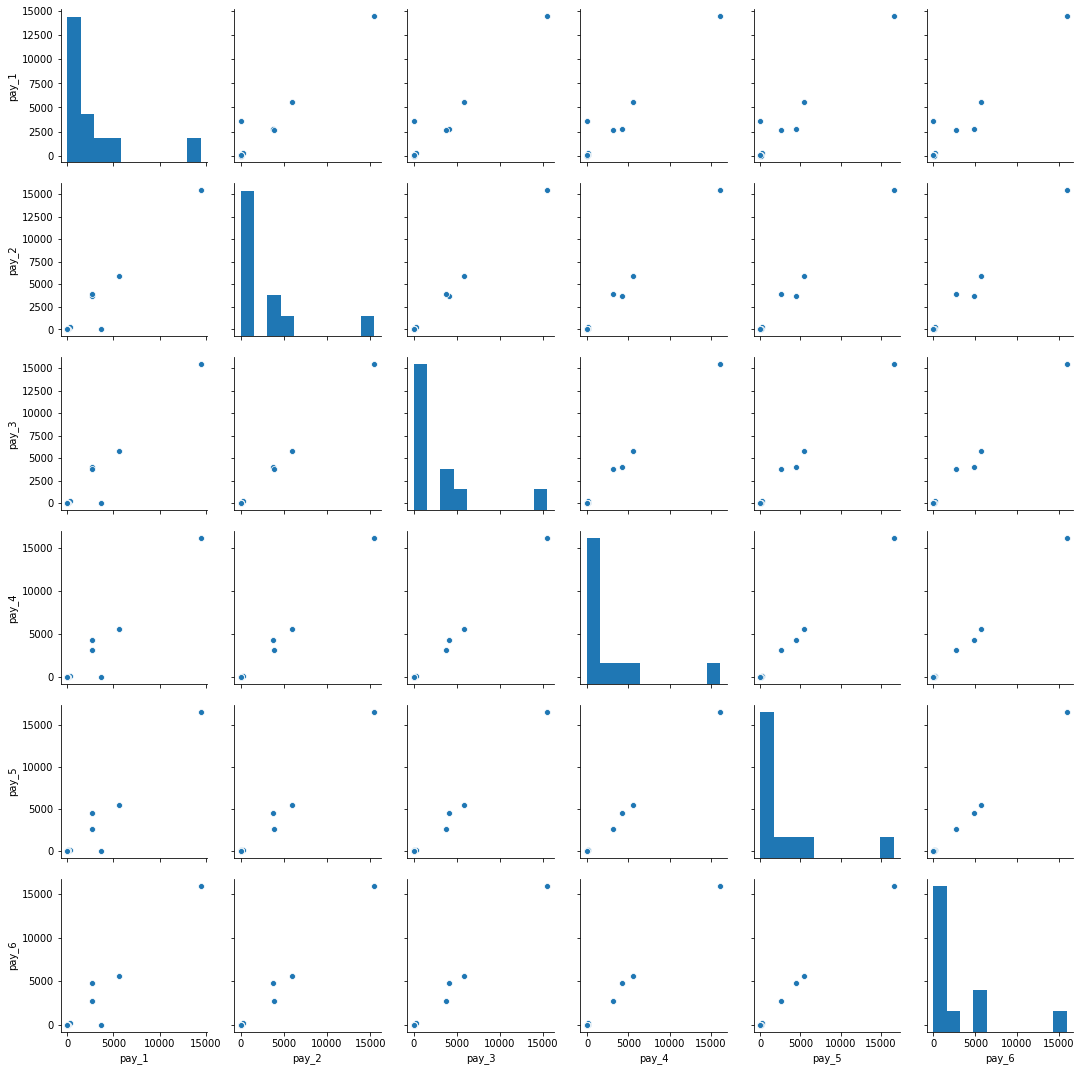

In [30]:
sns.pairplot(gv)

We see that for all repayment statuses (pay_x) share a positive correclation, indicating that for each (or regardless of) \payment month, there is a detrending pattern of the number of clients being late a payment.

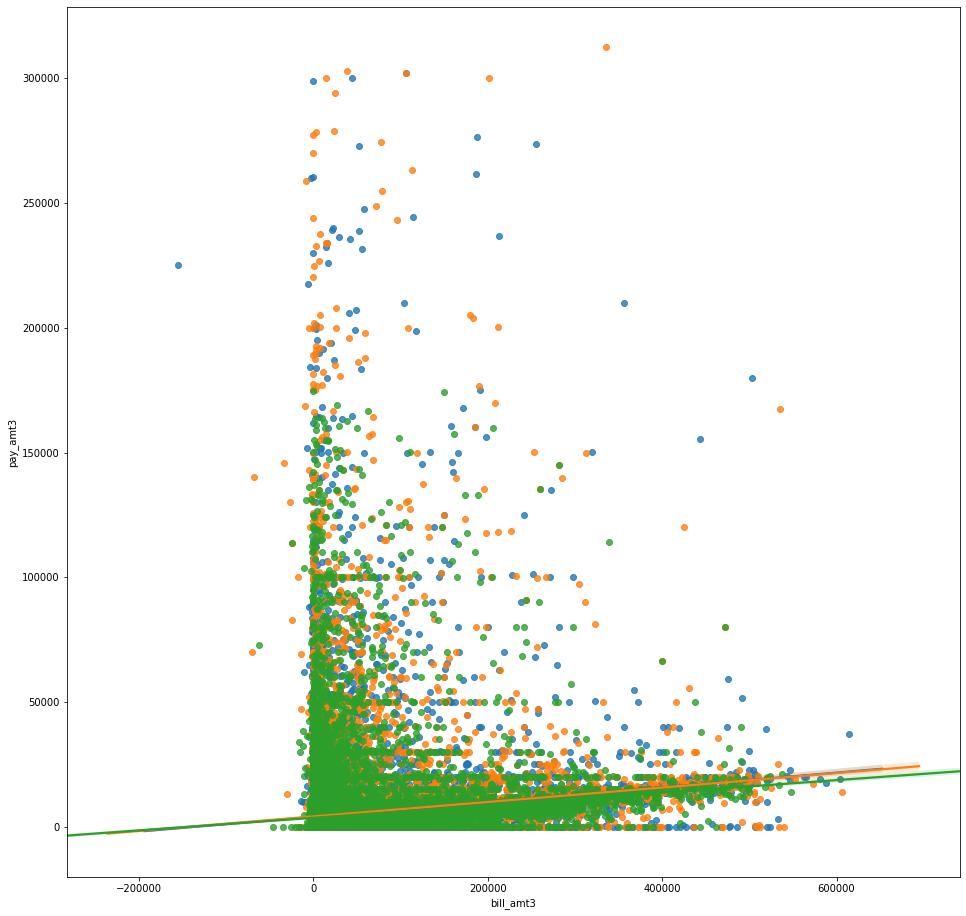

In [31]:
plt.figure(figsize=(16, 16))
sns.regplot(x="bill_amt1", y="pay_amt1", data=data);
sns.regplot(x="bill_amt2", y="pay_amt2", data=data);
sns.regplot(x="bill_amt3", y="pay_amt3", data=data);

There does not seem to be a line of best fit when plotting the payment amount versus bill amount for a particular month. We see there are several outliers where the bill or pay amount is negative. This should not be possible because an account can not have a negative amount for a bill statment. We can clean this up.

In [32]:
data.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'defaulted'],
      dtype='object')

In [33]:
cols = ['bill_amt1', 'bill_amt2','bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6',
 'pay_amt1','pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']

In [34]:
#indexNames = dfObj[ (dfObj['Age'] >= 30) & (dfObj['Age'] <= 40) ].index
#dfObj.drop(indexNames , inplace=True)

indexNames = []
for col in cols:
    indexNames.append(data[data[col] < -1].index)

In [35]:
indexNames = data[
    (data.bill_amt1 < 0) |
    (data.bill_amt2 < 0) |
    (data.bill_amt3 < 0) |
    (data.bill_amt4 < 0) |
    (data.bill_amt5 < 0) |
    (data.bill_amt6 < 0) 
].index
#dfObj.drop(indexNames , inplace=True)

In [36]:
len(indexNames)

1880

In [37]:
indexNames

Int64Index([    7,    25,    34,    36,    53,    65,    69,    88,    97,
              105,
            ...
            29314, 29324, 29350, 29371, 29382, 29383, 29418, 29422, 29448,
            29457],
           dtype='int64', length=1880)

In [38]:
data_new = data.drop(indexNames)

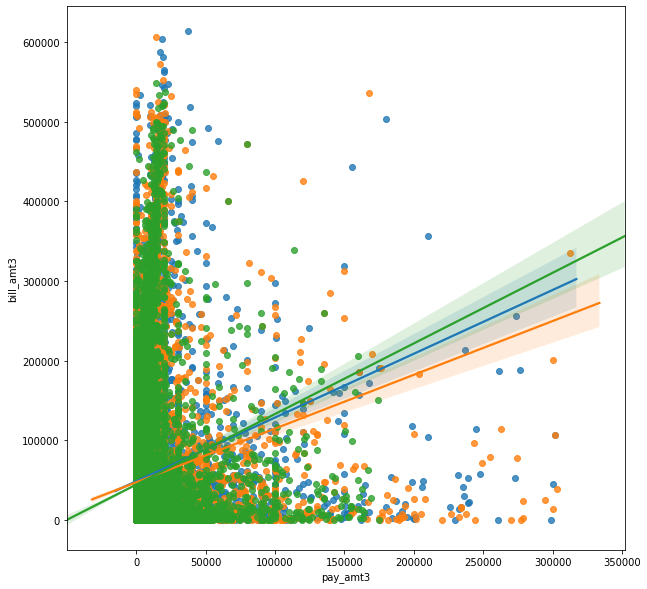

In [39]:
plt.figure(figsize=(10, 10))
sns.regplot(x="pay_amt1", y="bill_amt1", data=data_new);
sns.regplot(x="pay_amt2", y="bill_amt2", data=data_new);
sns.regplot(x="pay_amt3", y="bill_amt3", data=data_new);

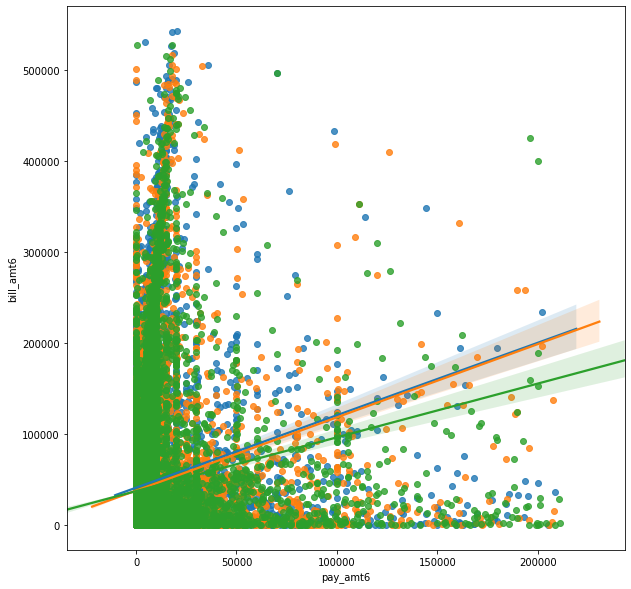

In [40]:
plt.figure(figsize=(10, 10))
sns.regplot(x="pay_amt4", y="bill_amt4", data=data_new);
sns.regplot(x="pay_amt5", y="bill_amt5", data=data_new);
sns.regplot(x="pay_amt6", y="bill_amt6", data=data_new);

We see that the higher the bill amount, the lower the actual customer payment. The majority of payments appear to be at or near the actual bill amount.
As the sample dataset is skewed towards customers as not defaulted (77.9%), we can visualize the data points of customers whom exceeded or did not meet the repayment based on the  actual bill amount.

Based on this data exploration, it would be interesting to see what other correlations of features may exist and whether or not certain features (i.e. pay and bill_amt) can be used to improve the final data model.